<a href="https://colab.research.google.com/github/chongweelow/ACEassignment/blob/main/Ace_Digital_Assignment_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1
---

A customer informed their consultant that they have developed several formulations of petrol 
that gives different characteristics of burning pattern. The formulations are obtaining by adding 
varying levels of additives that, for example, prevent engine knocking, gum prevention, stability 
in storage, and etc. However, a third party certification organisation would like to verify if the 
formulations are significantly different, and request for both physical and statistical proof. Since 
the formulations are confidential information, they are not named in the dataset. 
Please assist the consultant in the area of statistical analysis by doing this;

1.   A descriptive analysis of the additives (columns named as “a” to “i”), which must include 
summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is 
a must.

2.   A graphical analysis of the additives, including a distribution study.
3.   A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.


# Import dependencies and dataset
---

In [11]:
# Import dependencies
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
# Load dataset 
df = pd.read_csv("https://raw.githubusercontent.com/chongweelow/ACEassignment/main/ingredient.csv")

# Exploratory data analysis (EDA)
---

## Explore dataset 

In [13]:
# Return the random n samples.
df.sample(10)

,a,b,c,d,e,f,g,h,i
177,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.0
100,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.0
201,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.0
47,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.0
84,1.51617,14.95,0.00,2.27,73.30,0.00,8.71,0.67,0.0
55,1.51567,13.29,3.45,1.21,72.74,0.56,8.57,0.00,0.0
19,1.51824,12.87,3.48,1.29,72.95,0.60,8.43,0.00,0.0
121,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.0
193,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.0
17,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0.00,0.0


In [14]:
# Check columns and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


## Descriptive statistics

In [15]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Findings: 
---


*   Feature (column) a and i have low variance with respective standard deviation is 0.003037 (a) and 0.097439 (i)
*   The varied range of the mean is observed. Hence, the data need to be standardized






## Visualization

### General settings

In [16]:
# Retina quality figures.
# %config InlineBackend.figure_format = 'retina'
# sns.set()

# Set figure size. (n inches by n inches)
sns.set(rc = {'figure.figsize':(15,11)})

sns.set_context('poster', font_scale=0.7)

# Save figure as picture with .png format.
# plt.savefig('name.png', dpi = 300)

# Download picture into local drive.
# files.download('name.png')

### Heatmap (Correlation)
----

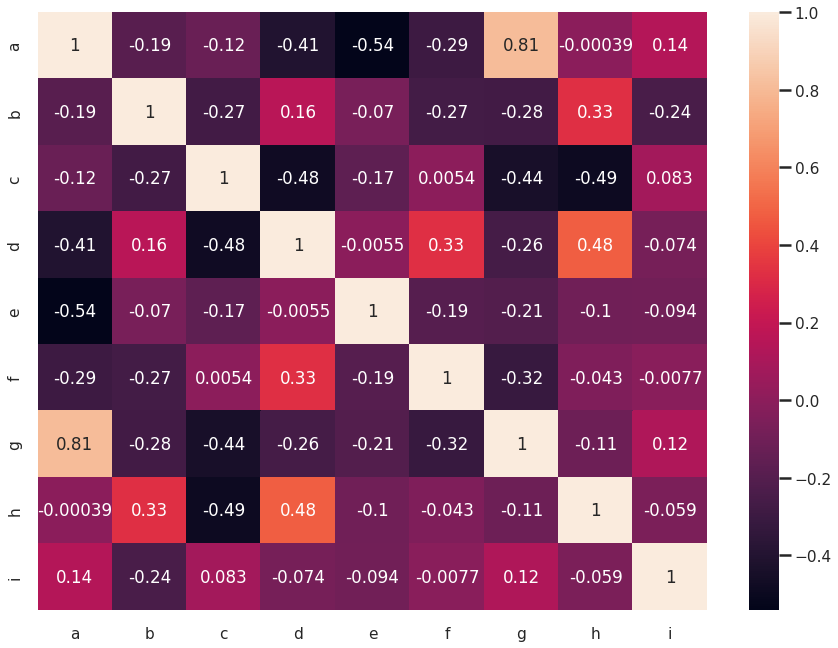

In [17]:
# Determine correlation of dataset.
corr    = df.corr()
# corr

# Visualization of dataset (Heatmap).
sns.heatmap(corr, annot = True);



Observations:
---


*   Feature 'a' and 'g' are highly correlated compare with other features (0.81)
*   Feature 'a' and 'h' have low correlation (-0.00039)
*   Feature e is negatively correlated with all other features
*   Feature 'a' and 'e' have moderately high negative correlation (-0.54)









### Distributions
---

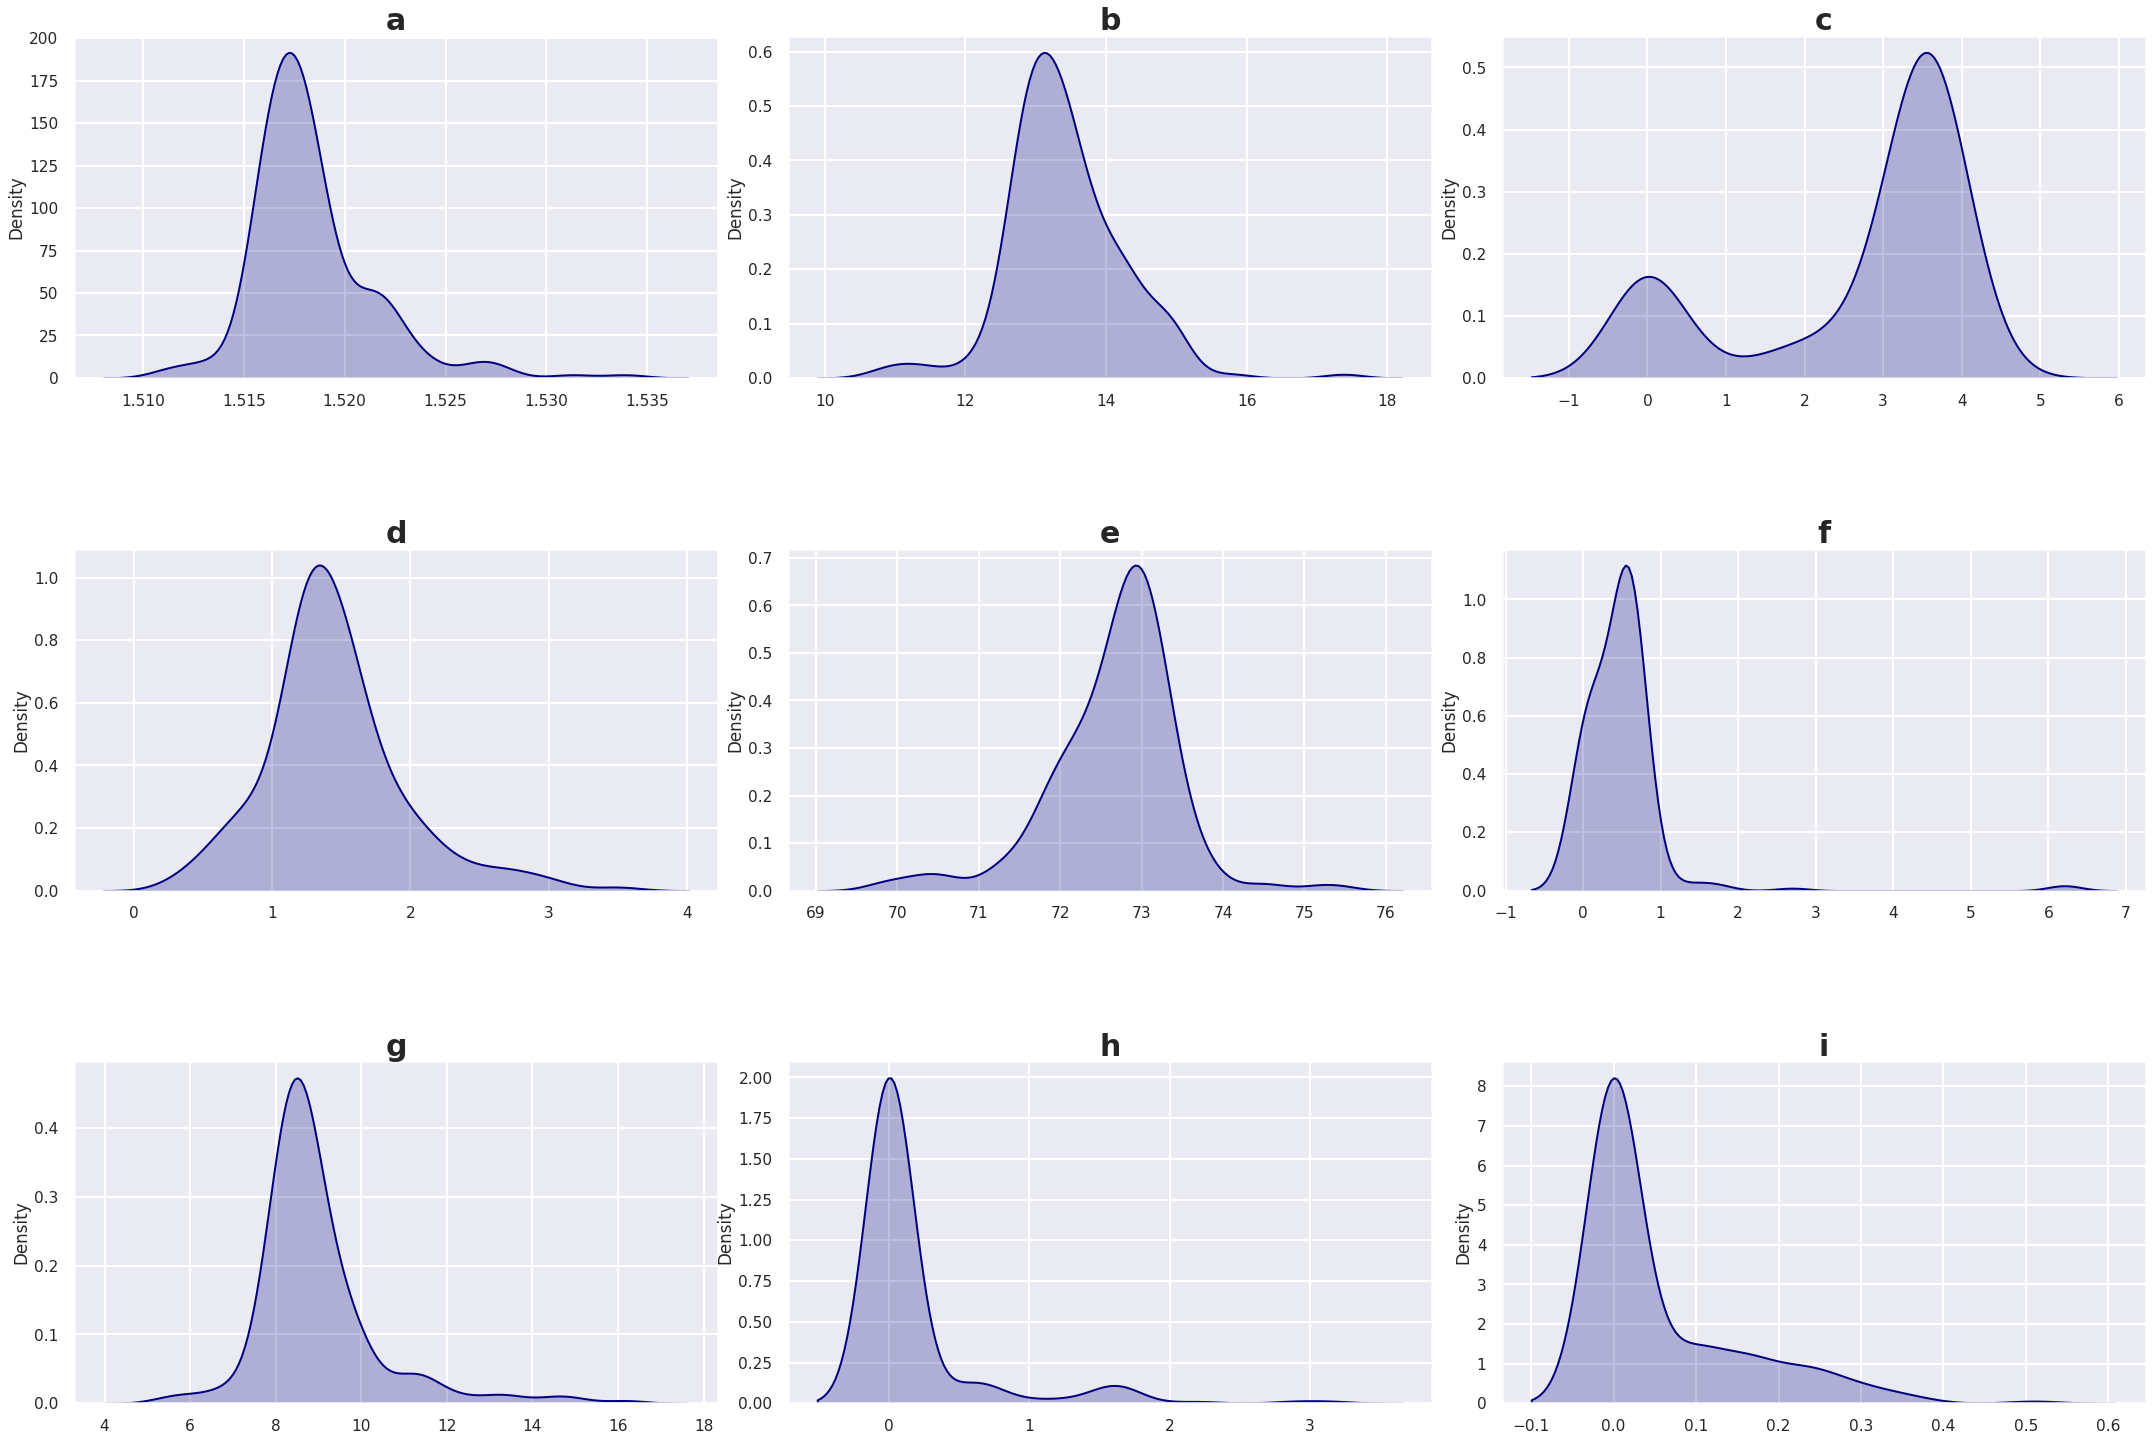

In [18]:
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(30,20))
fig.tight_layout()
axeslist = [axes[0,0],axes[0,1],axes[0,2],axes[1,0],axes[1,1],axes[1,2],axes[2,0],axes[2,1],axes[2,2]]
j=0
for col in df.columns:
    p= sns.kdeplot(data=df, ax=axeslist[j] ,x=col,fill=True,color="navy")
    p.set(xlabel=None)
    #fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    axeslist[j].set_title(col,fontweight="bold", size=30)
    j= j+1

Observation:
---


*   Feature a, d, f and g are right-skewed
*   Feature e is left-skewed
*   Feature c is bi-model

Check the QQ plot for these features





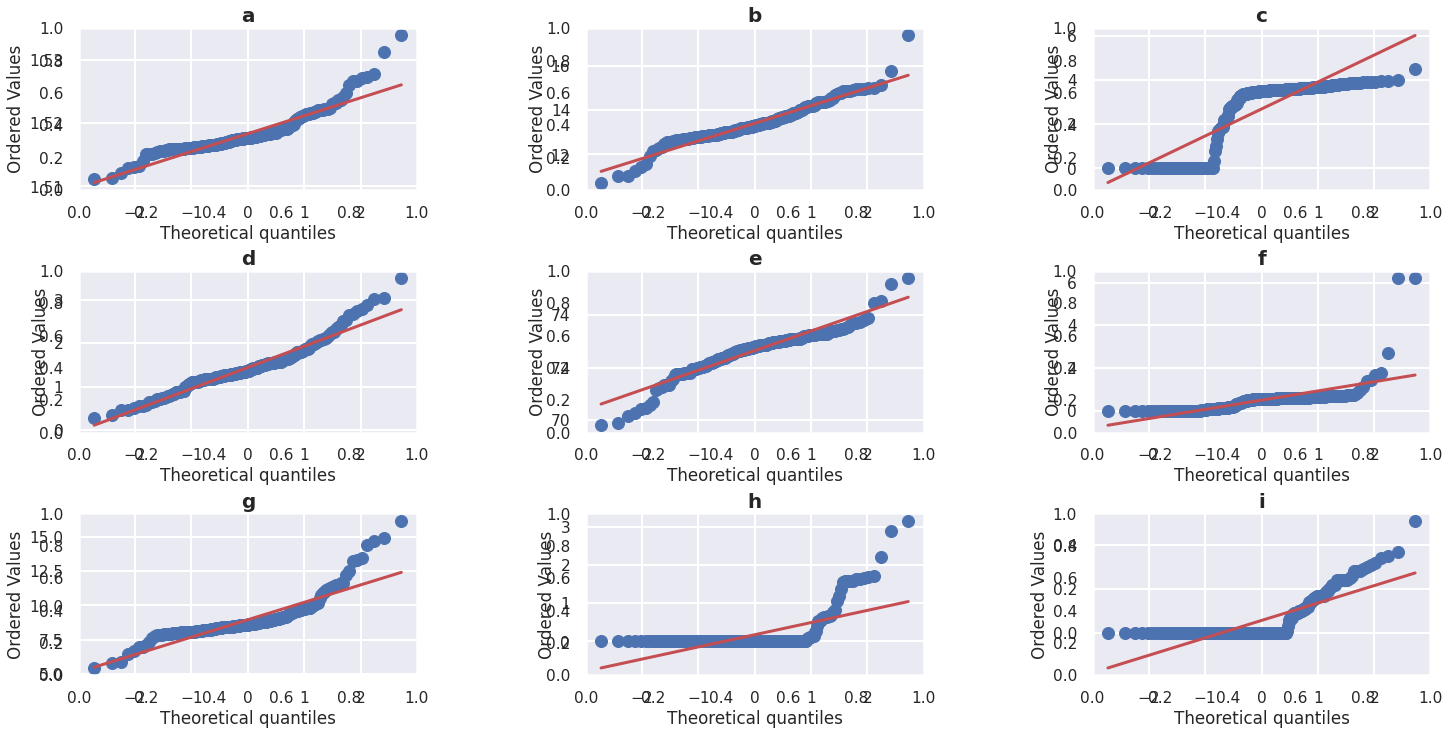

In [19]:
import scipy.stats as stats
import pylab
df_skewed = pd.DataFrame([df['a'],df['b'],df['c'],df['d'],df['e'],df['f'],df['g'],df['h'],df['i']]).T
#cols = [[df['a'],df['b'],df['c'],df['d'],df['e'],df['f'],df['g'],df['h'],df['i']]
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(20,10))
fig.tight_layout()
axeslist = [331,332,333,334,335,336,337,338,339]
j=0
for col in df_skewed.columns:
    ax = fig.add_subplot(axeslist[j])
    p=stats.probplot(df_skewed[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1

Observations:
---


*   All features are not normally distributed.
*   Hence apply 'yeo-johnson' PowerTransformer on the above features on the non gaussian features to normalize the distribution. This will be done in Create Pipeline section



In [20]:
from scipy.stats import shapiro
def shapiroWilkTest(df):
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    alpha = 0.05
    clm= []
    stat1=[]
    p1=[]
    dist=[]
    j=0
    for c in df.columns:  
        stat, p = shapiro(df.iloc[:,j])
        clm.append(c)
        stat1.append(stat)
        p1.append(p)
        if p > alpha:
            dist.append('Gaussian') 
        else:
            dist.append('Not Gaussian')
        j=j+1
    scorecard['column'] = clm
    scorecard['stat'] = stat1
    scorecard['p'] = p1
    scorecard['Distribution'] = dist
    return scorecard

In [21]:
#Apply Shapiro-Wilk to test the null hypothesis that the data was drawn from a normal distribution.
shapiroWilkTest(df)

,column,stat,p,Distribution
0,a,0.867572,1.076643e-12,Not Gaussian
1,b,0.945762,3.465683e-07,Not Gaussian
2,c,0.699336,2.390899e-19,Not Gaussian
3,d,0.943413,2.083196e-07,Not Gaussian
4,e,0.919661,2.174813e-09,Not Gaussian
5,f,0.441617,2.172175e-25,Not Gaussian
6,g,0.793868,4.286654e-16,Not Gaussian
7,h,0.408565,5.383263e-26,Not Gaussian
8,i,0.653200,1.156669e-20,Not Gaussian


Outliers
---
------

In [22]:
from sklearn.preprocessing import MinMaxScaler
#Normalize data to view boxplot
scalerMM = MinMaxScaler()
df_norm= pd.DataFrame(scalerMM.fit_transform(df))
df_norm.columns=df.columns

In [23]:
df_norm.sample(5)

,a,b,c,d,e,f,g,h,i
168,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.000000
40,0.200176,0.299248,0.770601,0.395639,0.605357,0.107890,0.247212,0.000000,0.470588
26,0.208516,0.314286,0.783964,0.501558,0.544643,0.111111,0.236059,0.000000,0.000000
105,0.482002,0.523308,0.850780,0.056075,0.350000,0.017713,0.384758,0.000000,0.000000
73,0.323090,0.371429,0.808463,0.242991,0.539286,0.091787,0.276952,0.028571,0.333333


Non Gaussian Distribution
---

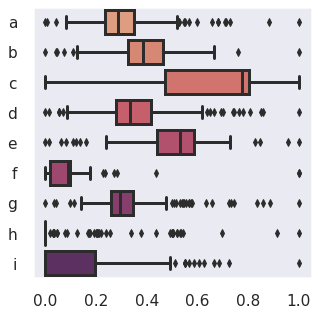

In [24]:
#View outliers for non Gaussian distributions
plt.figure(figsize=(5,5))
sns.set_style("dark")
sns.boxplot(data=df_norm, orient="h", palette = 'flare')

In [25]:
#wine_norm_nooutlier = wine_norm[0:0]
df_norm_nooutlier = df_norm

Feature 'a'
---

In [26]:
# Detection of outliers (find limits for feature 'a' based on IQR)
IQR = df_norm['a'].quantile(0.75) - df_norm['a'].quantile(0.25)
upper_limit = df_norm['a'].quantile(0.75) + (IQR * 1.4)
lower_limit = df_norm['a'].quantile(0.25) - (IQR * 1.5)
df_norm[(df_norm['a']<lower_limit)| (df_norm['a']>upper_limit)]

,a,b,c,d,e,f,g,h,i
1,0.882353,0.000000,0.000000,0.563863,0.000000,0.093398,0.731413,1.000000,0.549020
2,0.520193,0.387970,0.797327,0.165109,0.389286,0.019324,0.440520,0.000000,0.058824
17,0.568481,0.466165,0.645880,0.274143,0.239286,0.012882,0.498141,0.000000,0.000000
42,0.729587,0.287218,0.000000,0.118380,0.394643,0.009662,0.833643,0.000000,0.000000
46,0.007024,0.445113,0.712695,0.473520,0.535714,0.283414,0.000000,0.377778,0.000000
82,0.528973,0.449624,0.828508,0.068536,0.346429,0.014493,0.430297,0.000000,0.313725
87,0.548727,0.760902,0.407572,0.317757,0.110714,0.049919,0.295539,0.533333,0.000000
101,0.597015,0.108271,0.000000,0.495327,0.425000,0.130435,0.725836,0.000000,0.666667
109,0.681299,0.490226,0.824053,0.130841,0.314286,0.003221,0.407993,0.000000,0.196078
121,0.679982,0.075188,0.000000,0.149533,0.607143,0.000000,0.859665,0.000000,0.000000


In [27]:
df_norm_nooutlier['a'] = np.where(df_norm['a']>upper_limit,upper_limit,np.where(df_norm['a']<lower_limit,lower_limit,df_norm['a']))

Feature 'b'
---

In [28]:
# Detection of outliers (find limits for feature 'b' based on IQR)
IQR = df_norm['b'].quantile(0.75) - df_norm['b'].quantile(0.25)
upper_limit = df_norm['b'].quantile(0.75) + (IQR * 1.4)
lower_limit = df_norm['b'].quantile(0.25) - (IQR * 1.5)
df_norm[(df_norm['b']<lower_limit)| (df_norm['b']>upper_limit)]

,a,b,c,d,e,f,g,h,i
1,0.513455,0.000000,0.000000,0.563863,0.000000,0.093398,0.731413,1.000000,0.549020
69,0.172520,0.664662,0.000000,0.610592,0.658929,0.000000,0.270446,0.200000,0.000000
87,0.513455,0.760902,0.407572,0.317757,0.110714,0.049919,0.295539,0.533333,0.000000
101,0.513455,0.108271,0.000000,0.495327,0.425000,0.130435,0.725836,0.000000,0.666667
121,0.513455,0.075188,0.000000,0.149533,0.607143,0.000000,0.859665,0.000000,0.000000
144,0.513455,0.043609,0.000000,0.143302,0.583929,0.000000,0.885688,0.000000,0.000000
185,0.062335,1.000000,0.000000,0.015576,1.000000,0.000000,0.113383,0.000000,0.000000
201,0.454785,0.045113,0.380846,0.395639,0.648214,0.093398,0.575279,0.000000,0.000000


In [29]:
df_norm_nooutlier['b'] = np.where(df_norm['b']>upper_limit,upper_limit,np.where(df_norm['b']<lower_limit,lower_limit,df_norm['b']))

Feature 'd'
---

In [30]:
# Detection of outliers (find limits for feature 'd' based on IQR)
IQR = df_norm['d'].quantile(0.75) - df_norm['d'].quantile(0.25)
upper_limit = df_norm['d'].quantile(0.75) + (IQR * 1.4)
lower_limit = df_norm['d'].quantile(0.25) - (IQR * 1.5)
df_norm[(df_norm['d']<lower_limit)| (df_norm['d']>upper_limit)]

,a,b,c,d,e,f,g,h,i
7,0.088235,0.344361,0.000000,0.856698,0.119643,1.000000,0.142193,0.000000,0.000000
22,0.193591,0.472180,0.000000,0.700935,0.610714,0.022544,0.369888,0.257143,0.019608
24,0.175154,0.493233,0.596882,1.000000,0.014286,0.270531,0.040892,0.698413,0.000000
48,0.230465,0.547368,0.000000,0.763240,0.542857,0.000000,0.373606,0.171429,0.000000
49,0.268657,0.596992,0.000000,0.638629,0.619643,0.000000,0.327138,0.209524,0.000000
69,0.172520,0.658571,0.000000,0.610592,0.658929,0.000000,0.270446,0.200000,0.000000
71,0.216857,0.643609,0.000000,0.691589,0.578571,0.008052,0.315985,0.168254,0.000000
82,0.513455,0.449624,0.828508,0.068536,0.346429,0.014493,0.430297,0.000000,0.313725
84,0.220369,0.634586,0.000000,0.616822,0.623214,0.000000,0.304833,0.212698,0.000000
86,0.373573,0.607519,0.835189,0.000000,0.394643,0.004831,0.331784,0.000000,0.000000


In [31]:
df_norm_nooutlier['d'] = np.where(df_norm['d']>upper_limit,upper_limit,np.where(df_norm['d']<lower_limit,lower_limit,df_norm['d']))

Feature 'e'
---

In [32]:
# Detection of outliers (find limits for feature 'e' based on IQR)
IQR = df_norm['e'].quantile(0.75) - df_norm['e'].quantile(0.25)
upper_limit = df_norm['e'].quantile(0.75) + (IQR * 1.4)
lower_limit = df_norm['e'].quantile(0.25) - (IQR * 1.5)
df_norm[(df_norm['e']<lower_limit)| (df_norm['e']>upper_limit)]

,a,b,c,d,e,f,g,h,i
1,0.513455,0.120489,0.000000,0.563863,0.000000,0.093398,0.731413,1.000000,0.549020
7,0.088235,0.344361,0.000000,0.609346,0.119643,1.000000,0.142193,0.000000,0.000000
24,0.175154,0.493233,0.596882,0.609346,0.014286,0.270531,0.040892,0.698413,0.000000
87,0.513455,0.658571,0.407572,0.317757,0.110714,0.049919,0.295539,0.533333,0.000000
96,0.496927,0.621053,0.489978,0.551402,0.080357,0.122383,0.402416,0.000000,0.000000
146,0.308604,0.449624,0.000000,0.084112,0.828571,0.000000,0.516729,0.000000,0.000000
150,0.513455,0.461654,0.701559,0.115265,0.135714,0.012882,0.577138,0.000000,0.000000
178,0.513455,0.236090,0.000000,0.221184,0.062500,0.019324,1.000000,0.000000,0.470588
185,0.062335,0.658571,0.000000,0.074766,1.000000,0.000000,0.113383,0.000000,0.000000
200,0.080773,0.551880,0.387528,0.389408,0.846429,0.000000,0.200743,0.000000,0.000000


In [33]:
df_norm_nooutlier['e'] = np.where(df_norm['e']>upper_limit,upper_limit,np.where(df_norm['e']<lower_limit,lower_limit,df_norm['e']))

Feature 'f'
---

In [34]:
# Detection of outliers (find limits for feature 'f' based on IQR)
IQR = df_norm['f'].quantile(0.75) - df_norm['f'].quantile(0.25)
upper_limit = df_norm['f'].quantile(0.75) + (IQR * 1.5)
df_norm[df_norm['f']>upper_limit]

,a,b,c,d,e,f,g,h,i
7,0.088235,0.344361,0.000000,0.609346,0.224777,1.000000,0.142193,0.000000,0.0
24,0.175154,0.493233,0.596882,0.609346,0.224777,0.270531,0.040892,0.698413,0.0
46,0.062335,0.445113,0.712695,0.473520,0.535714,0.283414,0.000000,0.377778,0.0
59,0.317384,0.539850,0.726058,0.601246,0.257143,0.235105,0.033457,0.517460,0.0
181,0.314311,0.550376,0.000000,0.476636,0.544643,0.227053,0.096654,0.914286,0.0
205,0.236172,0.183459,0.000000,0.280374,0.787143,0.434783,0.325279,0.000000,0.0
213,0.090430,0.341353,0.000000,0.609346,0.224777,1.000000,0.139405,0.000000,0.0


In [35]:
df_norm_nooutlier['f'] = np.where(df_norm['f']>upper_limit,upper_limit,df_norm['f'])

Feature 'g'
---

In [36]:
# Detection of outliers (find limits for feature 'g' based on IQR)
IQR = df_norm['g'].quantile(0.75) - df_norm['g'].quantile(0.25)
upper_limit = df_norm['g'].quantile(0.75) + (IQR * 1.4)
lower_limit = df_norm['g'].quantile(0.25) - (IQR * 1.5)
df_norm[(df_norm['g']<lower_limit)| (df_norm['g']>upper_limit)]

,a,b,c,d,e,f,g,h,i
1,0.513455,0.120489,0.000000,0.563863,0.224777,0.093398,0.731413,1.000000,0.549020
17,0.513455,0.466165,0.645880,0.274143,0.239286,0.012882,0.498141,0.000000,0.000000
24,0.175154,0.493233,0.596882,0.609346,0.224777,0.215982,0.040892,0.698413,0.000000
28,0.485953,0.556391,0.000000,0.221184,0.510714,0.016103,0.565985,0.000000,0.156863
30,0.374890,0.287218,0.000000,0.423676,0.703571,0.061192,0.566914,0.000000,0.000000
41,0.351624,0.514286,0.000000,0.560748,0.523214,0.000000,0.506506,0.000000,0.000000
42,0.513455,0.287218,0.000000,0.118380,0.394643,0.009662,0.833643,0.000000,0.000000
44,0.407375,0.398496,0.000000,0.345794,0.435714,0.053140,0.657063,0.000000,0.000000
46,0.062335,0.445113,0.712695,0.473520,0.535714,0.215982,0.000000,0.377778,0.000000
59,0.317384,0.539850,0.726058,0.601246,0.257143,0.215982,0.033457,0.517460,0.000000


In [37]:
df_norm_nooutlier['g'] = np.where(df_norm['g']>upper_limit,upper_limit,np.where(df_norm['g']<lower_limit,lower_limit,df_norm['g']))

Feature 'h'
---

In [38]:
# Detection of outliers (find limits for feature 'h' based on IQR)
IQR = df_norm['h'].quantile(0.75) - df_norm['h'].quantile(0.25)
upper_limit = df_norm['h'].quantile(0.75) + (IQR * 1.5)
df_norm[df_norm['h']>upper_limit]

,a,b,c,d,e,f,g,h,i
1,0.513455,0.120489,0.000000,0.563863,0.224777,0.093398,0.469145,1.000000,0.549020
12,0.378402,0.463158,0.797327,0.320872,0.341071,0.019324,0.301115,0.219048,0.000000
15,0.413960,0.318797,0.358575,0.585670,0.423214,0.122383,0.396840,0.076190,1.000000
22,0.193591,0.472180,0.000000,0.609346,0.610714,0.022544,0.369888,0.257143,0.019608
24,0.175154,0.493233,0.596882,0.609346,0.224777,0.215982,0.131157,0.698413,0.000000
32,0.238367,0.612030,0.000000,0.529595,0.589286,0.000000,0.264870,0.542857,0.000000
46,0.062335,0.445113,0.712695,0.473520,0.535714,0.215982,0.131157,0.377778,0.000000
48,0.230465,0.547368,0.000000,0.609346,0.542857,0.000000,0.373606,0.171429,0.000000
49,0.268657,0.596992,0.000000,0.609346,0.619643,0.000000,0.327138,0.209524,0.000000
57,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.000000


In [39]:
df_norm_nooutlier['h'] = np.where(df_norm['h']>upper_limit,upper_limit,df_norm['h'])

Feature 'i'
---

In [40]:
# Detection of outliers (find limits for feature 'i' based on IQR)
IQR = df_norm['i'].quantile(0.75) - df_norm['i'].quantile(0.25)
upper_limit = df_norm['i'].quantile(0.75) + (IQR * 1.5)
df_norm[df_norm['i']>upper_limit]

,a,b,c,d,e,f,g,h,i
1,0.513455,0.120489,0.000000,0.563863,0.224777,0.093398,0.469145,0.0,0.549020
6,0.211150,0.309774,0.804009,0.414330,0.564286,0.103060,0.245353,0.0,0.509804
15,0.413960,0.318797,0.358575,0.585670,0.423214,0.122383,0.396840,0.0,1.000000
74,0.295874,0.369925,0.868597,0.314642,0.450000,0.088567,0.279740,0.0,0.549020
98,0.294557,0.300752,0.763920,0.280374,0.560714,0.099839,0.309480,0.0,0.588235
101,0.513455,0.120489,0.000000,0.495327,0.425000,0.130435,0.469145,0.0,0.666667
124,0.317823,0.318797,0.817372,0.295950,0.492857,0.099839,0.302045,0.0,0.686275
139,0.481124,0.520301,0.841871,0.193146,0.276786,0.037037,0.344796,0.0,0.725490
162,0.062335,0.339850,0.772829,0.258567,0.566071,0.099839,0.271375,0.0,0.607843
180,0.244952,0.386466,0.810690,0.386293,0.485714,0.104670,0.241636,0.0,0.568627


In [41]:
df_norm_nooutlier['i'] = np.where(df_norm['i']>upper_limit,upper_limit,df_norm['i'])

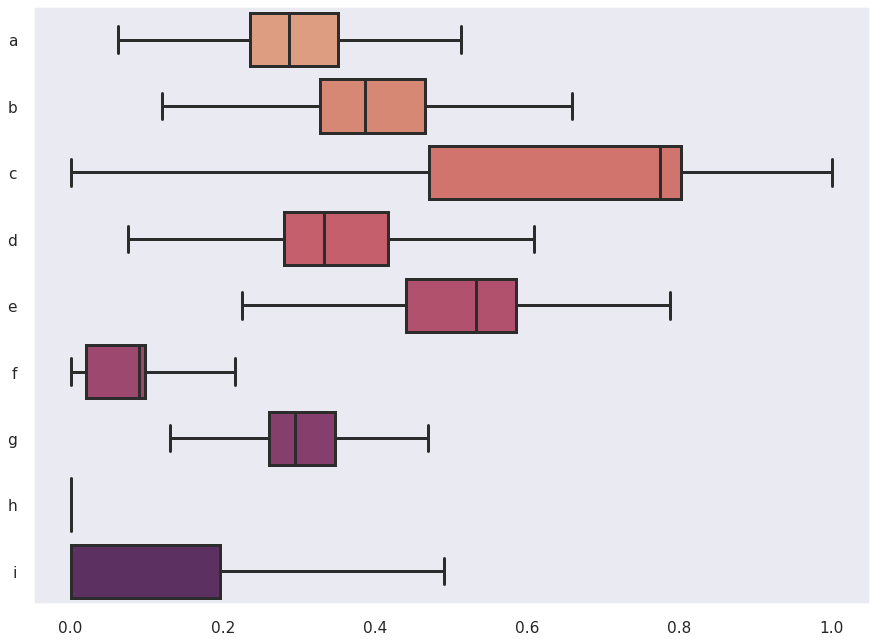

In [42]:
sns.boxplot(data=df_norm_nooutlier, orient="h", palette = 'flare')

Observations:
---


*   Outliers exist in 8 features a, b, d, e, f, g, h and i.
*   We will replace outliers and store in dataframe df_norm_nooutlier and use for K-Means which is sensitive to distance based outliers.









Transform Input vectors
---
-----

In [43]:
# Scaling - Standardize the numerical variables 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

yeojohnson = ColumnTransformer([
    ('ptransform',PowerTransformer(method='yeo-johnson', standardize=False), slice(0,13))
])

scaling = ColumnTransformer([
    ('scale',StandardScaler(), slice(0,13))
])

Create Pipeline
---
----

In [44]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('yeojohnson',yeojohnson),
    ('scaling',scaling)
])

In [45]:
# Apply the tranformation
df_transformed = pipe.fit_transform(df_norm_nooutlier) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [46]:
#verify shape remains same after tranformation
tuple(map(lambda i, j: i - j, df.shape, df_transformed.shape))

(0, 0)

In [47]:
# View sample records after transformation
df_transformed[0:2,:]

array([[-0.27573416, -0.49914945,  0.57973971,  0.66710807,  0.0135037 ,
         0.37806741, -0.35522675,  0.        ,  0.95714519],
       [ 1.83603636, -2.72338027, -1.67359759,  1.59173692, -2.12252257,
         0.50404666,  1.83151638,  0.        ,  1.68121092]])

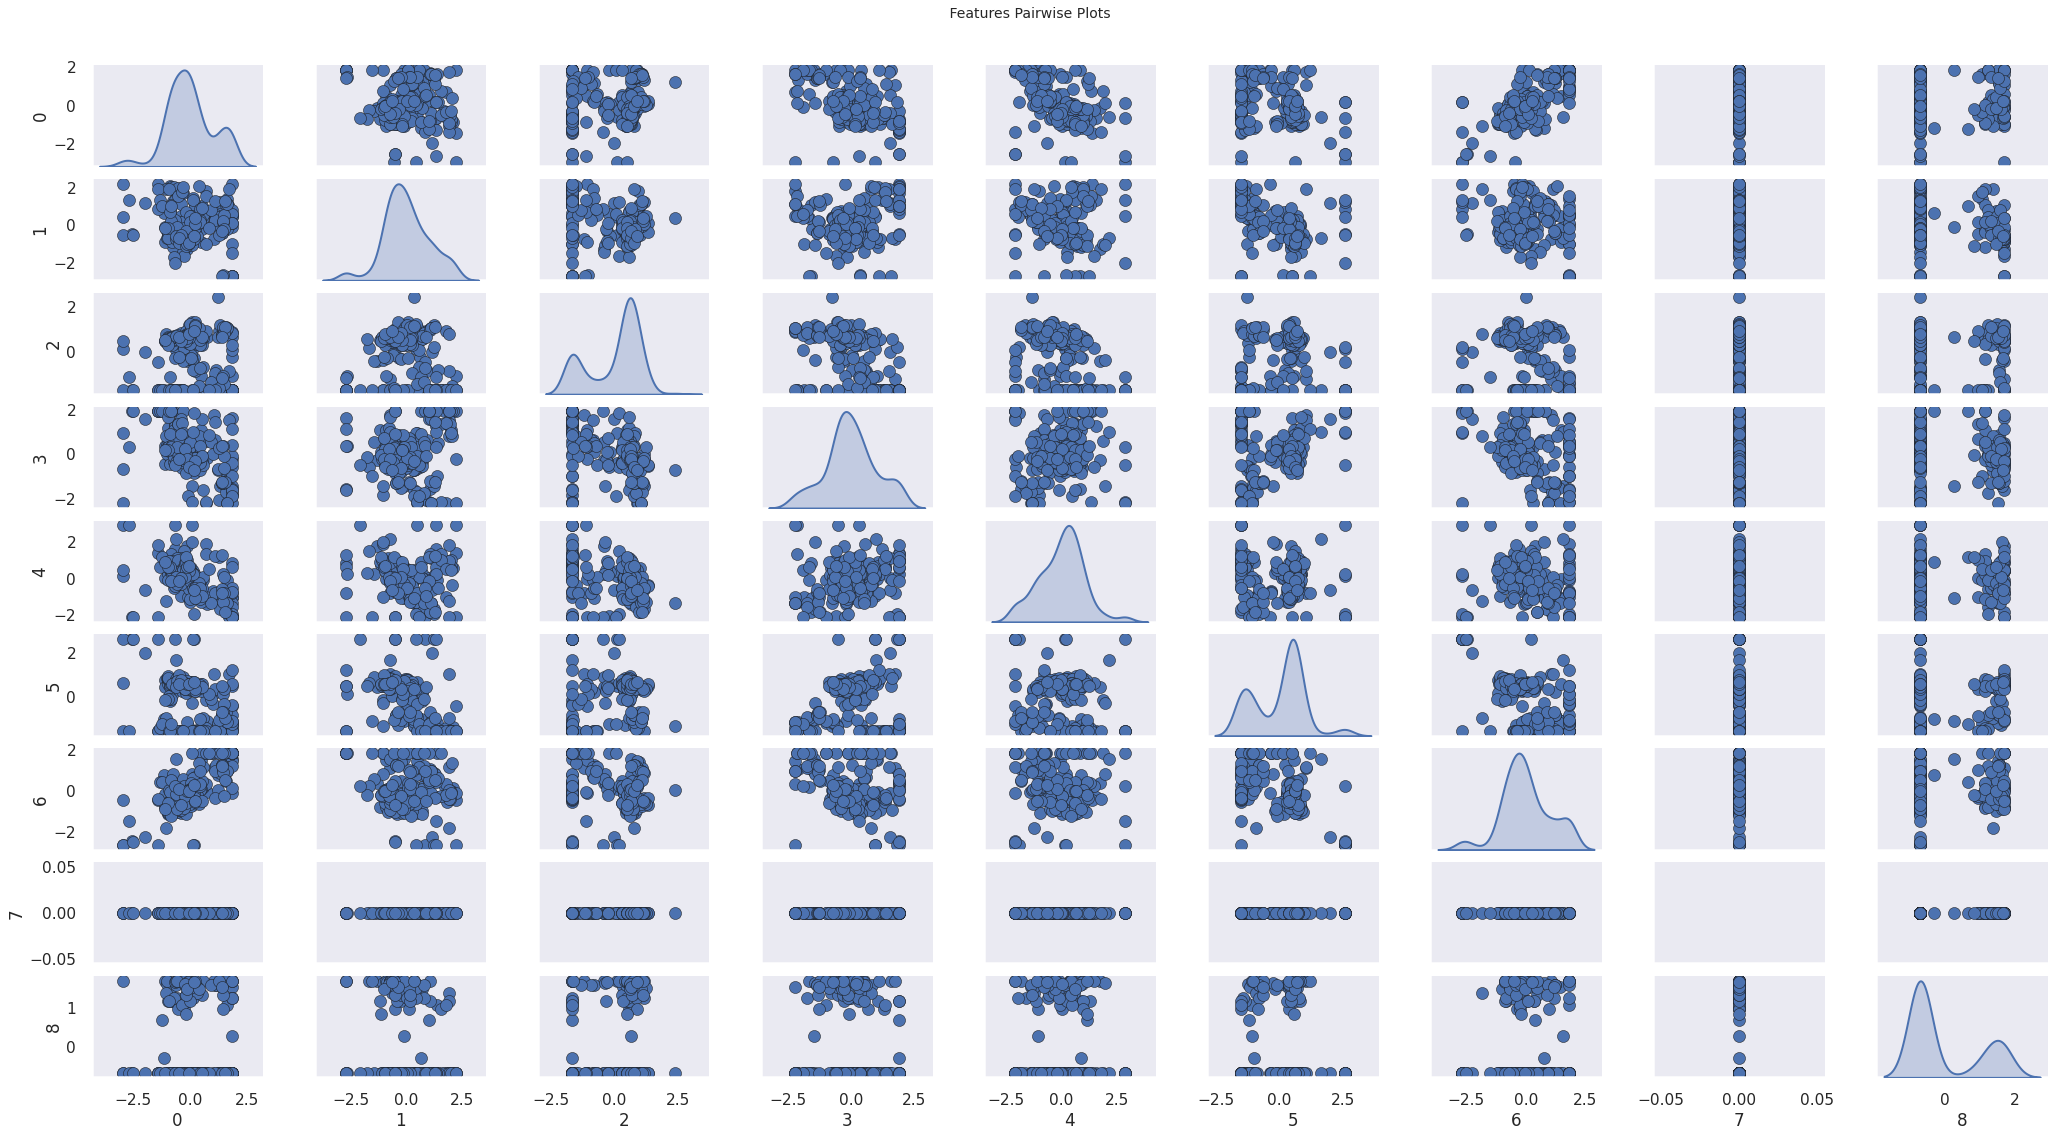

In [48]:
# Pair-wise Scatter Plots
wt = pd.DataFrame(df_transformed)
pp = sns.pairplot(wt, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle(' Features Pairwise Plots', fontsize=14)

In [49]:
# View Tranformation steps
pipe.named_steps

{'scaling': ColumnTransformer(transformers=[('scale', StandardScaler(),
                                  slice(0, 13, None))]),
 'yeojohnson': ColumnTransformer(transformers=[('ptransform',
                                  PowerTransformer(standardize=False),
                                  slice(0, 13, None))])}

Fit the model and Analyze
---
----

K Means Clustering

We use the WSS to determine candidates for the number of clusters. k-means++ for faster/efficient convergence.



Evaluate k with Elbow Graph


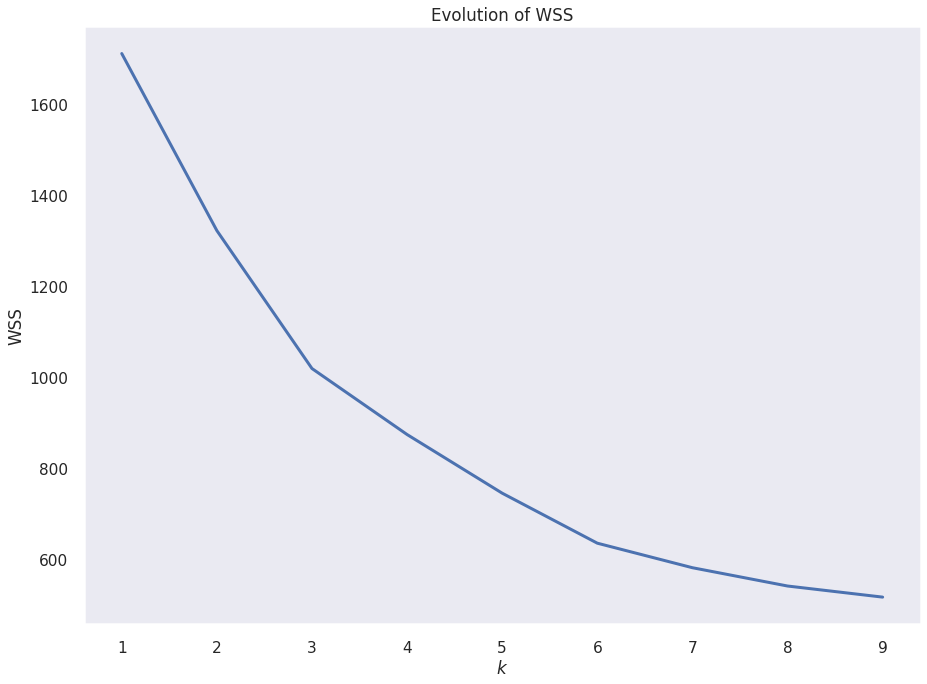

In [50]:
from sklearn.cluster import KMeans

inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(init = 'k-means++',n_clusters=iter, random_state=2)
    kmeans.fit(df_transformed)
    y_kmeans = kmeans.predict(df_transformed)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

Observations:

 The elbow graph indicates an optima of 3 clusters



Apply K Means clustering


In [51]:
kmeans = KMeans(init = 'k-means++' ,n_clusters=3, random_state=2)
kmeans.fit(df_transformed)
y_kmeans = kmeans.predict(df_transformed)

In [52]:
# Data points spread
y_kmeans

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1,
       2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [53]:
# Data points count per label
unique, counts = np.unique(y_kmeans, return_counts=True)
np.asarray((unique, counts)).T

array([[  0,  54],
       [  1, 130],
       [  2,  30]])

Aggloramative had resulted in 6 clusters with array


*   0 : 54
*   1 : 130
*   2 : 30






Visualize Scatter plot

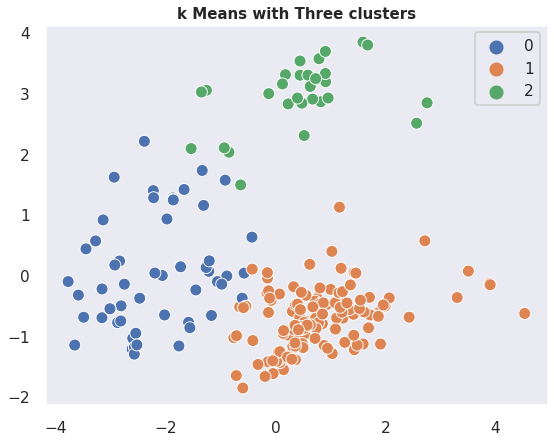

In [54]:
from sklearn import decomposition

# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
df_pca = pca.fit_transform(df_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=y_kmeans, x=df_pca[:,0], y=df_pca[:,1],palette="deep")
plt.title("k Means with Three clusters",fontsize=15,fontweight="bold")
plt.show()


 Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score

In [55]:
from sklearn.metrics import silhouette_score ,calinski_harabasz_score , davies_bouldin_score

# Calculate Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score for 3 clusters separated by k Means
s = silhouette_score(df_transformed, y_kmeans)
c = calinski_harabasz_score(df_transformed, y_kmeans)
d = davies_bouldin_score(df_transformed, y_kmeans) 
print('silhouette_score = ', round(s,3),'\ncalinski_harabasz_score = ', round(c,3), '\ndavies_bouldin_score = ' ,round(d,3))

silhouette_score =  0.349 
calinski_harabasz_score =  71.629 
davies_bouldin_score =  1.287


In [56]:
#Add to compare models table
compare_models = pd.DataFrame()
df1 = {'model': 'kMeans', 'silhouette': s, 'calinski_harabasz': c,'davies_bouldin': d}
compare_models = compare_models.append(df1, ignore_index = True)
compare_models

,model,silhouette,calinski_harabasz,davies_bouldin
0,kMeans,0.348585,71.629127,1.287245


K Medoids Clustering

Evaluate k with Elbow Graph

     |████████████████████████████████| 1.7 MB 23.0 MB/s 


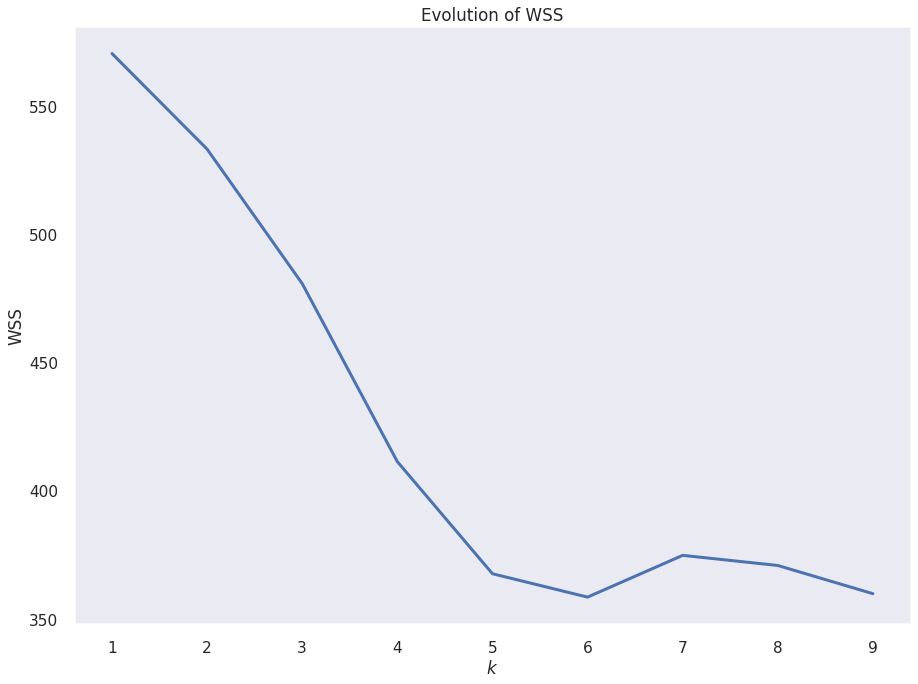

In [57]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
inertia = []
k = range(1,10)
for iter in k:
    kmedoids = KMedoids(n_clusters=iter, random_state=0).fit(df_transformed)
    inertia.append(kmedoids.inertia_ ) # we already store this for later, inertia=WSS
plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

Observations:

 The elbow graph indicates an optima of 3 clusters



Apply K Medoid clustering

In [58]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(df_transformed)
kmedoids.labels_

array([1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2,
       0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0,
       2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2,
       1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2,
       0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1])

In [59]:
# Data points count per label
unique, counts = np.unique(kmedoids.labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 72],
       [ 1, 54],
       [ 2, 88]])

Visualize the Scatter Plot

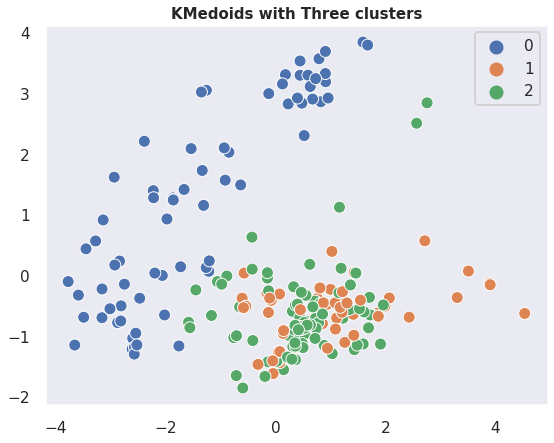

In [60]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
df_pca = pca.fit_transform(df_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=kmedoids.labels_, x=df_pca[:,0], y=df_pca[:,1],palette="deep")
plt.title("KMedoids with Three clusters",fontsize=15,fontweight="bold")
plt.show()

In [61]:
# Calculate Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score for 4 clusters separated by k kmedoids
s = silhouette_score(df_transformed, kmedoids.labels_)
c = calinski_harabasz_score(df_transformed, kmedoids.labels_)
d = davies_bouldin_score(df_transformed, kmedoids.labels_) 
print('silhouette_score = ', round(s,3),'\ncalinski_harabasz_score = ', round(c,3), '\ndavies_bouldin_score = ' ,round(d,3))

silhouette_score =  0.111 
calinski_harabasz_score =  38.78 
davies_bouldin_score =  2.108


In [62]:
#Add to compare models table
df2 = {'model': 'kmedoids', 'silhouette': s, 'calinski_harabasz': c,'davies_bouldin': d}
compare_models = compare_models.append(df2, ignore_index = True)
compare_models

,model,silhouette,calinski_harabasz,davies_bouldin
0,kMeans,0.348585,71.629127,1.287245
1,kmedoids,0.111133,38.780168,2.107532


Comparison
---
----

Compare to k-Medoids, k-means clustering has better silhouette_score and davies_bouldin_score for 3 clusters